In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [34]:
feature_data=pd.read_csv(r"C:\Users\HP\Desktop\phonepeproject\Sales Forecasting\features.csv")
store_data=pd.read_csv(r"Sales Forecasting/stores.csv")
sales_data=pd.read_csv(r"C:\Users\HP\Desktop\phonepeproject\Sales Forecasting\train.csv")

In [35]:
df=pd.merge(sales_data,store_data,on='Store')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [37]:
di=pd.merge(df,feature_data,on=['Store', 'Date'],how='inner')
di

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [38]:
di.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday_x          2
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday_y          2
dtype: int64

In [40]:
di.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [41]:
cat_col=['Store',"Dept","Type","Size","IsHoliday"]
continuous_col=['Temperature','Fuel_Price','CPI','Unemployment',"Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
df_numeric=di.select_dtypes(include=np.number)

In [42]:
di.drop(['IsHoliday_x'],axis=1,inplace=True)
di.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)

In [43]:
di.fillna(0,inplace=True)

In [44]:
di.drop(columns=("Date"),inplace=True)

In [47]:
di.head(5)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2,50605.27,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2,1,3,13740.12,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
3,1,4,39954.04,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
4,1,5,32229.38,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False


In [50]:
def plot(df,col):
  fig,ax=plt.subplots(1,2)
  sns.distplot(df[col],ax=ax[0])
  sns.boxplot(df[col],ax=ax[1])
  plt.show()
  


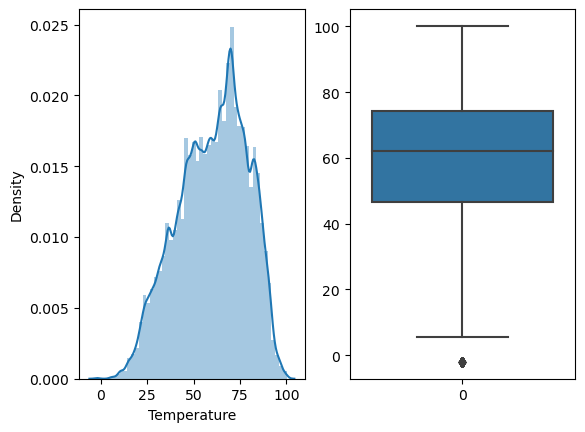

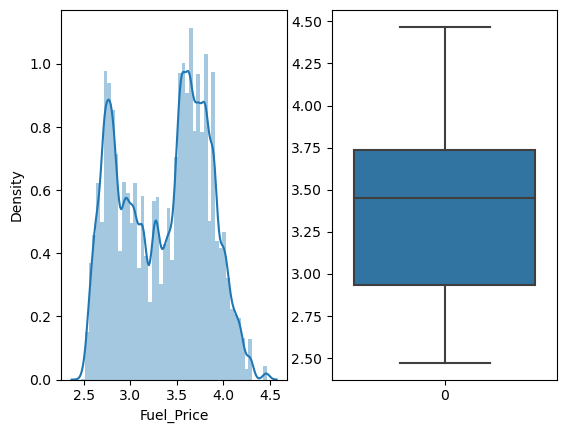

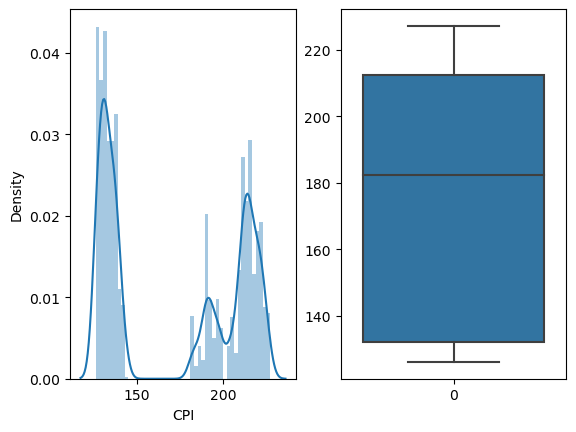

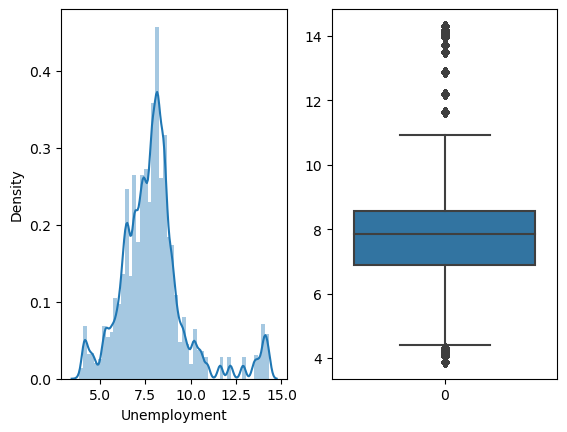

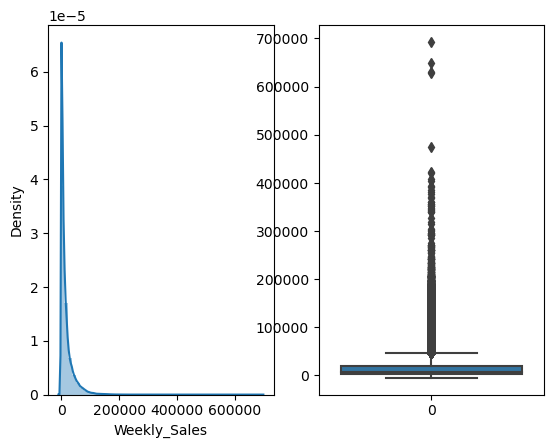

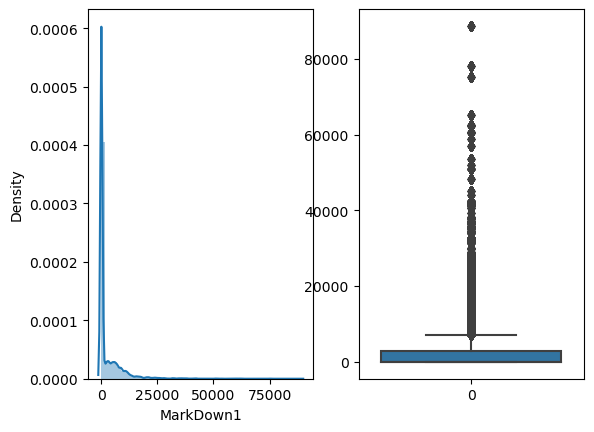

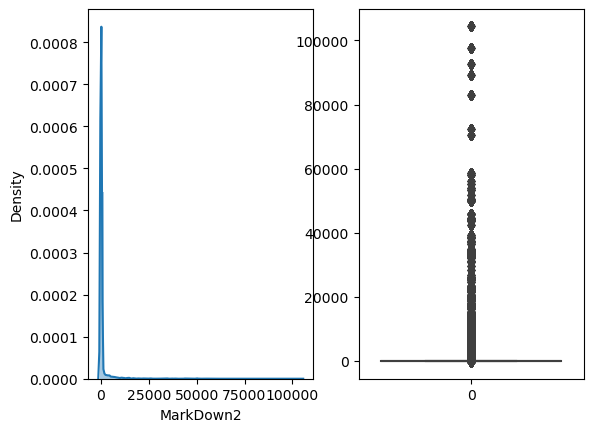

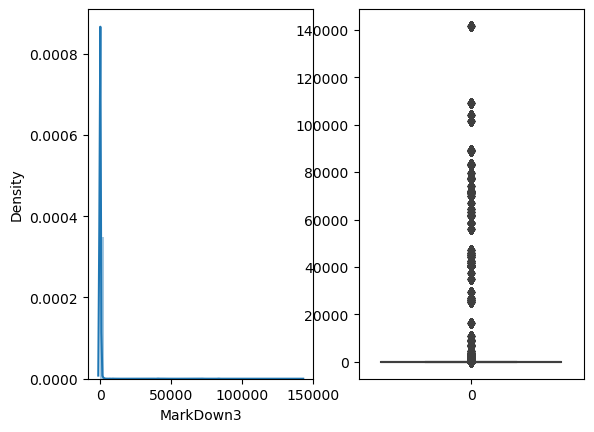

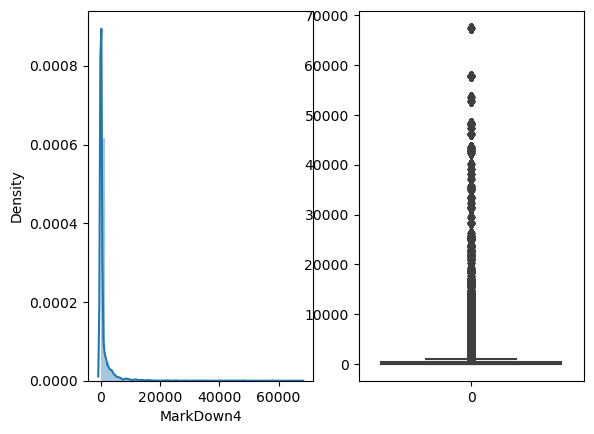

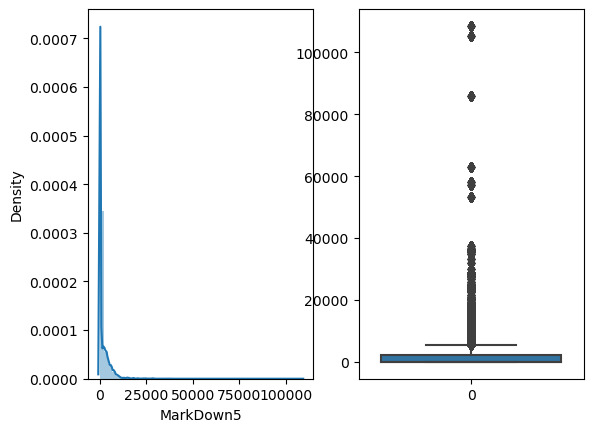

In [51]:
for features in continuous_col:
  plot(di,features)

In [52]:
df=di.copy()

In [53]:
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])
  df.head()

In [61]:
x=df.drop(['Weekly_Sales'],axis=1)
y=df['Weekly_Sales']
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print("r2_score_train =", r2_train)
print("r2_score_test =", r2_test)
print(mean_squared_error(y_test,y_pred_test))


r2_score_train = 0.08917721844719839
r2_score_test = 0.08725669103146205
10834946290.63422


In [60]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = RF_model.predict(x_train)
y_pred_test = RF_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("r2_score_train =", r2_train)
print("r2_score_test =", r2_test)


r2_score_train = 0.9949756047853608
r2_score_test = 0.9641850957757154
